In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
#for rules
from skfuzzy import control as ctrl

In [3]:
#fi
fi_norm = np.arange(-90,270.01,0.01,dtype = np.float)
fi = ctrl.Antecedent(np.arange(-90,270.01,0.01,dtype = np.float), 'fi')

In [4]:
fi_norm

array([-90.  , -89.99, -89.98, ..., 269.98, 269.99, 270.  ])

In [5]:
a,c = -115,-15
b = (a+c)/2
fi_s3 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_s3'] = fi_s3

a,c = -45,45
b = (a+c)/2
fi_s2 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_s2'] = fi_s2

a,c = 15,90
b = (a+c)/2
fi_s1 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_s1'] = fi_s1

a,c = 80,100
b = (a+c)/2
fi_ce = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_ce'] = fi_ce

a,c = 90,165
b = (a+c)/2
fi_b1 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_b1'] = fi_b1

a,c = 135,225
b = (a+c)/2
fi_b2 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_b2'] = fi_b2

a,c = 195,295
b = (a+c)/2
fi_b3 = fuzz.trimf(fi_norm,[a,b,c])
fi['fi_b3'] = fi_b3

In [6]:
#find amount of sth
fi_b2[int((200 -(-90))/0.01)]

0.5555555555522587

/home/fatemeh/.conda/envs/hw1/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


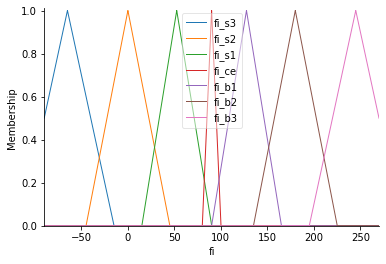

In [7]:
fi.view()

In [8]:
#x
x_norm = np.arange(0,20.01,0.01,dtype = np.float)
x = ctrl.Antecedent(np.arange(0,20.01,0.01,dtype = np.float), 'x')

In [9]:
a,b,c,d = 0,0,1.5,7
x_s2 = fuzz.trapmf(x_norm,[a,b,c,d])
x['x_s2'] = x_s2

x_s1 = fuzz.trimf(x_norm,[4,7,10])
x['x_s1'] = x_s1

x_ce = fuzz.trimf(x_norm,[9,10,11])
x['x_ce'] = x_ce

x_b1 = fuzz.trimf(x_norm,[10,13,16])
x['x_b1']= x_b1

a,b,c,d = 13,18.5,20,20
x_b2 = fuzz.trapmf(x_norm,[a,b,c,d])
x['x_b2'] = x_b2

/home/fatemeh/.conda/envs/hw1/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


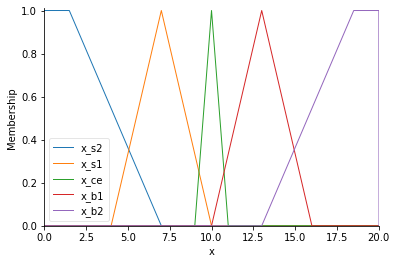

In [10]:
x.view()

In [11]:
#theta
theta_norm = np.arange(-40,40.01,0.01,dtype = np.float)
theta = ctrl.Consequent(np.arange(-40,40.01,0.01,dtype = np.float), 'theta')

In [12]:
theta_s3 = fuzz.trimf(theta_norm,[-40,-40,-20])
theta['theta_s3'] = theta_s3

theta_s2 = fuzz.trimf(theta_norm,[-33,-20,-7])
theta['theta_s2'] = theta_s2

theta_s1 = fuzz.trimf(theta_norm,[-14,-7,0])
theta['theta_s1'] = theta_s1

theta_ce = fuzz.trimf(theta_norm,[-4,0,4])
theta['theta_ce'] = theta_ce

theta_b1 = fuzz.trimf(theta_norm,[0,7,14])
theta['theta_b1'] = theta_b1

theta_b2 = fuzz.trimf(theta_norm,[7,20,33])
theta['theta_b2'] = theta_b2

theta_b3 = fuzz.trimf(theta_norm,[20,40,40])
theta['theta_b3'] = theta_b3

In [13]:
theta_b3[int((30-(-40))/0.01)]

0.49999999999930367

/home/fatemeh/.conda/envs/hw1/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


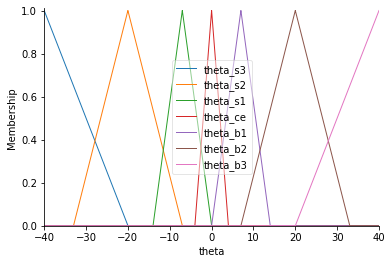

In [14]:
theta.view()

In [15]:
rules = []
D = [] # [[first_antecedent,second_antecedent],[degree,consequence]]

In [16]:
#rules

def calculate_rule(x1,fi1,theta1):
    dic_theta = {1:theta_s3,2:theta_s2,3:theta_s1,4:theta_ce,5:theta_b1,6:theta_b2,7:theta_b3}
    dic_theta_names = {1:'theta_s3',2:'theta_s2',3:'theta_s1',4:'theta_ce',5:'theta_b1',6:'theta_b2',7:'theta_b3'}
    
    max_theta_member = np.argmax([dic_theta[i][int((theta1-(-40))/0.01)] for i in range(1,8)])

    dic_x = {1:x_s2,2:x_s1,3:x_ce,4:x_b1,5:x_b2}
    dic_x_names = {1:'x_s2',2:'x_s1',3:'x_ce',4:'x_b1',5:'x_b2'}

    max_x = np.argmax([dic_x[i][int(x1*100)] for i in range(1,6)])

    dic_fi = {1:fi_s3,2:fi_s2,3:fi_s1,4:fi_ce,5:fi_b1,6:fi_b2,7:fi_b3}
    dic_fi_names = {1:'fi_s3',2:'fi_s2',3:'fi_s1',4:'fi_ce',5:'fi_b1',6:'fi_b2',7:'fi_b3'}

    max_fi_member = np.argmax([dic_fi[i][int((fi1-(-90))/0.01)] for i in range(1,8)])

    #rules.append(ctrl.Rule(fi[dic_fi_names[max_fi_member+1]] & x[dic_x_names[max_x+1]],theta[dic_theta_names[max_theta_member+1]]))
    
    m_fi = dic_fi[max_fi_member+1][int((fi1-(-90))/0.01)]
    m_theta = dic_theta[max_theta_member+1][int((theta1-(-40))/0.01)]
    m_x = dic_x[max_x+1][int(x1*100)]
    m = m_x * m_theta * m_fi 
    
    array = [[max_fi_member,max_x] in D[i] for i in range(0,len(D))] #array of true and false that shows this antecedent are in D or not 
    
    if True in array:
        index_true = array.index(True)
        
        if m > D[index_true][1][0]:
            D[index_true][1] = [m,max_theta_member]
    else:
        D.append([[max_fi_member,max_x],[m,max_theta_member]])



In [17]:
import math


In [18]:
#table 1
D=[]

t = 17
fi1 = 0
theta1 = -19
x1= 1
thetas=[-19,-17.95,-16.9,-15.85,-14.8,-13.75,-12.7,-11.65,-10.6,-9.55,-8.5,-7.45,-6.4,-5.34,-4.3,-3.25,-2.2,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    x1 = round(x1 + math.cos(math.radians(fi1)+math.radians(thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
#rules

In [19]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.13233338181870022, 1]],
 [[2, 1], [0.33005645714142023, 2]],
 [[3, 1], [0.07579671428732054, 2]],
 [[3, 2], [0.3402000000026271, 3]]]

In [20]:
#table 2
t = 19
x1= 1
fi1 = 90
theta1 = 18

thetas=[18,16,14,12,10,8,6,4,2,0,-2,-4,-6,-8,-10,-12,-14,-16,-18,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1)+math.radians(thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    


In [21]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.07579671428732054, 2]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.2017199999991051, 1]]]

In [22]:
#table 3
t = 17
x1= 1
fi1 = -90
theta1 = -30

thetas=[-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

    

In [23]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.07579671428732054, 2]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.3669757264945991, 1]]]

In [24]:
#table 4
t = 6
x1= 7
fi1 = 0
theta1 = -40

thetas=[-40,-38.5,-37,-35.5,-34,-3,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
   

In [25]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.07579671428732054, 2]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]]]

In [26]:
#table 5
spare_rule = rules
t = 13
x1= 7
fi1 = 90
theta1 = 12

thetas=[12,10.06,8.12,6.18,4.24,2.3,0.34,-1.58,-3.52,-5.46,-7.40,-9.34,-11.28,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
   

In [27]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.38461538461104705, 5]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]]]

In [28]:
#table 6
spare_rule = rules
t = 20
x1= 7
fi1 = 180
theta1 = 40

thetas=[40,36.8,33.6,30.4,27.2,24,20.8,17.6,14.4,11.2,8,4.8,1.6,-1.6,-4.8,-11.2,-14.4,-17.6,-20.8,-24,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
    

In [29]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.38461538461104705, 5]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]]]

In [30]:
#table 7
spare_rule = rules
t = 20
x1= 7
fi1 = -90
theta1 = -40

thetas=[-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,0,15,13,11,9,7,5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    


In [31]:
len(D)

18

In [32]:
#table 8
spare_rule = rules
t = 20
x1= 13
fi1 = 0
theta1 = -40

thetas=[-40,-36.8,-33.6,-30.4,-27.2,-24,-20.8,-17.6,-14.4,-11.2,-8,-4.8,-1.6,1.6,4.8,8,11.2,14.4,17.6,20.8,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
 

In [33]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.38461538461104705, 5]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 2], [0.43335288888810575, 0]],
 [[2, 3], [0.26300586666726017, 0]],
 [[3, 3], [0.2684534999964268, 0]],
 [[4, 3], [0.6221866666676137, 3]],
 [[4, 2], [0.2446681846176195, 5]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 4], [0.44972441957515175, 1]],
 [[4, 4], [0.30749423376691065, 2]]]

In [34]:
len(D)

22

In [35]:
#table 9
spare_rule = rules
t = 13
x1= 13
fi1 = 90
theta1 = -12

thetas=[-12,-10.05,-8.1,-6.15,-4.2,-2.25,-0.3,1.65,3.6,5.55,7.5,9.45,11.4,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

In [36]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.38461538461104705, 5]],
 [[3, 2], [0.9199999999896977, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 2], [0.43335288888810575, 0]],
 [[2, 3], [0.26300586666726017, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.6221866666676137, 3]],
 [[4, 2], [0.2446681846176195, 5]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 4], [0.44972441957515175, 1]],
 [[4, 4], [0.30749423376691065, 2]]]

In [37]:
#table 10
spare_rule = rules
t = 6
x1= 13
fi1 = 180
theta1 = 40

thetas=[40,38.05,37,35.5,34,5.5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

In [38]:
len(D)

23

In [39]:
#table 11
spare_rule = rules
t = 20
x1= 13
fi1 = 270
theta1 = 40

thetas=[40,39,38,37,36,35,34,33,32,31,30,29,28,0,-15,-13,-10,-8,-5.5,-3.5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [40]:
len(D)

25

In [41]:
#table 12
spare_rule = rules
t = 19
x1= 19
fi1 = 90
theta1 = -18

thetas=[-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [42]:
len(D)

25

In [43]:
#table 13
spare_rule = rules
t = 17
x1= 19
fi1 = 180
theta1 = 19

thetas=[19,17.95,16.9,15.85,14.8,13.75,12.7,11.65,10.6,9.55,8.5,7.45,6.4,5.45,4.5,3.55,2.5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [44]:
len(D)

26

In [45]:
#table 14
spare_rule = rules
t = 17
x1= 19
fi1 = 270
theta1 = 30

thetas=[30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,16.2,15.4,14.6,13.8]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [46]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[2, 0], [0.676724363635992, 4]],
 [[2, 1], [0.7433828571452745, 2]],
 [[3, 1], [0.38461538461104705, 5]],
 [[3, 2], [0.9622400000070147, 3]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 2], [0.3064246153834725, 1]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.26308479999879075, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 2], [0.43335288888810575, 0]],
 [[2, 3], [0.26300586666726017, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.7433828571391912, 4]],
 [[4, 2], [0.3130717538474277, 5]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 4], [0.846153846146391, 1]],
 [[4, 4], [0.6763345454559688, 2]],
 [[5, 3], [0.9999999999961346, 6]],
 [[6, 3], [0.8312499999959956, 6]],
 [[5, 2], [0.43766800000151884, 6]],
 [[5, 4], [0.9230769230731868, 5]],
 [[6, 4], [0.3719200000007276, 6]]]

In [47]:
#D array after 14 table 
D_total = D# [[first_antecedent(fi),second_antecedent(x)],[degree,consequence(theta)]]

In [48]:
len(D_total)

27

In [49]:
#calculate rules from degree array
rules = [] #array of rules
dic_theta_names = {1:'theta_s3',2:'theta_s2',3:'theta_s1',4:'theta_ce',5:'theta_b1',6:'theta_b2',7:'theta_b3'}
dic_x_names = {1:'x_s2',2:'x_s1',3:'x_ce',4:'x_b1',5:'x_b2'}
dic_fi_names = {1:'fi_s3',2:'fi_s2',3:'fi_s1',4:'fi_ce',5:'fi_b1',6:'fi_b2',7:'fi_b3'}
for i in range(0,len(D_total)):
    rules.append(ctrl.Rule(fi[dic_fi_names[D_total[i][0][0]+1]] & x[dic_x_names[D_total[i][0][1]+1]],theta[dic_theta_names[D_total[i][1][1]+1]],f"degree[{i}] is "+str(D_total[i][1][0])))
    
rules

[IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s2] THEN theta[theta_b1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_ce] AND x[x_s1] THEN theta[theta_b2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_ce] AND x[x_ce] THEN theta[theta_ce]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_ce] AND x[x_s2] THEN theta[theta_b2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_ce] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s3] AND x[x_s2] THEN theta[theta_s3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s1] THEN theta[theta_s3]
 	AND aggregation functio

In [50]:
for i in range(0,len(D_total)):
    print("rule",i+1,">>\n",rules[i],"\t\n",rules[i].label,"\n......\n")

rule 1 >>
 IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 	
 degree[0] is 0.9230769230763 
......

rule 2 >>
 IF fi[fi_s1] AND x[x_s2] THEN theta[theta_b1]
	AND aggregation function : fmin
	OR aggregation function  : fmax 	
 degree[1] is 0.676724363635992 
......

rule 3 >>
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_s1]
	AND aggregation function : fmin
	OR aggregation function  : fmax 	
 degree[2] is 0.7433828571452745 
......

rule 4 >>
 IF fi[fi_ce] AND x[x_s1] THEN theta[theta_b2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 	
 degree[3] is 0.38461538461104705 
......

rule 5 >>
 IF fi[fi_ce] AND x[x_ce] THEN theta[theta_ce]
	AND aggregation function : fmin
	OR aggregation function  : fmax 	
 degree[4] is 0.9622400000070147 
......

rule 6 >>
 IF fi[fi_ce] AND x[x_s2] THEN theta[theta_b2]
	AND aggregation function : fmin
	OR aggregation function  : fmax 	
 degree[5] is 0.8461538461451666 
......

r

In [51]:
#Testing system functionality on sample datas
import matplotlib.pyplot as plt

def calculate_test_data(x_test, fi_test):
    machine_ctrl = ctrl.ControlSystem(rules)
    machine = ctrl.ControlSystemSimulation(machine_ctrl)
    steps = []
    x_values, y_values = [x_test], [0]
    while not (9.8 < x_test < 10.2 and 89.5 < fi_test < 90.5):
        machine.inputs({'fi': fi_test, 'x': x_test})
        machine.compute()
        theta_test = machine.output['theta']
        steps.append({'x': x_test, 'fi': fi_test, 'theta': theta_test})
        if len(steps) > 100:
            print("number of iterations exeeded. no result")
            fig, ax = plt.subplots()
            ax.scatter(x_values, y_values)
            return
        
        x_values.append(x_test)
        y_values.append(y_values[-1] + math.sin(math.radians(fi_test)))
        x_test = round(x_test + math.cos(math.radians(fi_test)+math.radians(theta_test)) + math.sin(math.radians(fi_test)) * math.sin(math.radians(theta_test)),2)
        fi_test = round(fi_test - math.degrees((math.asin((0.5)*math.sin(math.radians(theta_test))))), 2)
    #     theta.view(sim=machine)

    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values)
    plt.show()

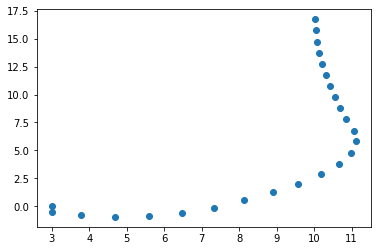

In [52]:
calculate_test_data(x_test=3, fi_test = -30)

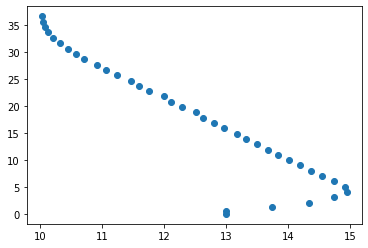

In [53]:
calculate_test_data(x_test=13, fi_test=30)

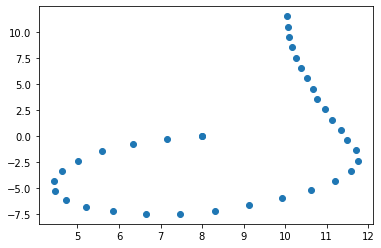

In [54]:
calculate_test_data(x_test=8, fi_test=-180)

In [55]:
# part three
#table 1
D=[]

t = 3
fi1 = 0
theta1 = -19
x1= 1
thetas=[-19,-17.95,-16.9,-15.85,-14.8,-13.75,-12.7,-11.65,-10.6,-9.55,-8.5,-7.45,-6.4,-5.34,-4.3,-3.25,-2.2,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    x1 = round(x1 + math.cos(math.radians(fi1)+math.radians(thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
#rules

In [56]:
D

[[[1, 0], [0.9230769230763, 1]]]

In [57]:
#table 2
t = 3
x1= 1
fi1 = 90
theta1 = 18

thetas=[18,16,14,12,10,8,6,4,2,0,-2,-4,-6,-8,-10,-12,-14,-16,-18,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1)+math.radians(thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

In [58]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]]]

In [59]:
#table 3
t = 3
x1= 1
fi1 = -90
theta1 = -30

thetas=[-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14,0]
calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

In [60]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]]]

In [61]:
#table 4
t = 3
x1= 7
fi1 = 0
theta1 = -40

thetas=[-40,-38.5,-37,-35.5,-34,-3,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
   

In [62]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.24643275555629504, 0]]]

In [63]:
#table 5
spare_rule = rules
t = 3
x1= 7
fi1 = 90
theta1 = 12

thetas=[12,10.06,8.12,6.18,4.24,2.3,0.34,-1.58,-3.52,-5.46,-7.40,-9.34,-11.28,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
   

In [64]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]]]

In [65]:
#table 6
spare_rule = rules
t = 3
x1= 7
fi1 = 180
theta1 = 40

thetas=[40,36.8,33.6,30.4,27.2,24,20.8,17.6,14.4,11.2,8,4.8,1.6,-1.6,-4.8,-11.2,-14.4,-17.6,-20.8,-24,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
    

In [66]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]]]

In [67]:
#table 7
spare_rule = rules
t = 3
x1= 7
fi1 = -90
theta1 = -40

thetas=[-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,0,15,13,11,9,7,5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    


In [68]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]]]

In [69]:
#table 8
spare_rule = rules
t = 3
x1= 13
fi1 = 0
theta1 = -40

thetas=[-40,-36.8,-33.6,-30.4,-27.2,-24,-20.8,-17.6,-14.4,-11.2,-8,-4.8,-1.6,1.6,4.8,8,11.2,14.4,17.6,20.8,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    
 

In [70]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]]]

In [71]:
#table 9
spare_rule = rules
t = 3
x1= 13
fi1 = 90
theta1 = -12

thetas=[-12,-10.05,-8.1,-6.15,-4.2,-2.25,-0.3,1.65,3.6,5.55,7.5,9.45,11.4,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

In [72]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.31766878095484, 2]]]

In [73]:
#table 10
spare_rule = rules
t = 3
x1= 13
fi1 = 180
theta1 = 40

thetas=[40,38.05,37,35.5,34,5.5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])
    

In [74]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.31766878095484, 2]],
 [[5, 3], [0.9999999999961346, 6]]]

In [75]:
#table 11
spare_rule = rules
t = 3
x1= 13
fi1 = 270
theta1 = 40

thetas=[40,39,38,37,36,35,34,33,32,31,30,29,28,0,-15,-13,-10,-8,-5.5,-3.5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [76]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.31766878095484, 2]],
 [[5, 3], [0.9999999999961346, 6]],
 [[6, 3], [0.8312499999959956, 6]]]

In [77]:
#table 12
spare_rule = rules
t = 3
x1= 19
fi1 = 90
theta1 = -18

thetas=[-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [78]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.31766878095484, 2]],
 [[5, 3], [0.9999999999961346, 6]],
 [[6, 3], [0.8312499999959956, 6]],
 [[3, 4], [0.846153846146391, 1]],
 [[4, 4], [0.24369230769364836, 1]]]

In [79]:
#table 13
spare_rule = rules
t = 3
x1= 19
fi1 = 180
theta1 = 19

thetas=[19,17.95,16.9,15.85,14.8,13.75,12.7,11.65,10.6,9.55,8.5,7.45,6.4,5.45,4.5,3.55,2.5,0]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [80]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.31766878095484, 2]],
 [[5, 3], [0.9999999999961346, 6]],
 [[6, 3], [0.8312499999959956, 6]],
 [[3, 4], [0.846153846146391, 1]],
 [[4, 4], [0.24369230769364836, 1]],
 [[5, 4], [0.9230769230731868, 5]]]

In [81]:
#table 14
spare_rule = rules
t = 3
x1= 19
fi1 = 270
theta1 = 30

thetas=[30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,16.2,15.4,14.6,13.8]

calculate_rule(x1,fi1,theta1)
for i in range(1,t+1):
    x1 = round(x1 + math.cos(math.radians(fi1+thetas[i-1])) + math.sin(math.radians(fi1)) * math.sin(math.radians(thetas[i-1])),2)
    fi1 = round(fi1 - math.degrees((math.asin((0.5)*math.sin(math.radians(thetas[i-1])) ))),2)
    calculate_rule(x1,fi1,thetas[i])

In [82]:
D

[[[1, 0], [0.9230769230763, 1]],
 [[3, 0], [0.8461538461451666, 5]],
 [[2, 0], [0.24369230769098368, 5]],
 [[0, 0], [0.3719999999999944, 0]],
 [[1, 1], [0.9999999999989768, 0]],
 [[2, 1], [0.31964372571201594, 4]],
 [[3, 1], [0.38461538461104705, 5]],
 [[5, 1], [0.9999999999961346, 6]],
 [[4, 1], [0.18805298399873538, 6]],
 [[4, 0], [0.20655786666577058, 6]],
 [[0, 1], [0.831250000000191, 0]],
 [[1, 3], [0.9999999999989768, 0]],
 [[2, 3], [0.18832973600059144, 0]],
 [[2, 4], [0.20655786666710832, 0]],
 [[3, 3], [0.38461538461227135, 1]],
 [[4, 3], [0.31766878095484, 2]],
 [[5, 3], [0.9999999999961346, 6]],
 [[6, 3], [0.8312499999959956, 6]],
 [[3, 4], [0.846153846146391, 1]],
 [[4, 4], [0.24369230769364836, 1]],
 [[5, 4], [0.9230769230731868, 5]],
 [[6, 4], [0.3719200000007276, 6]]]

In [83]:
D_total = D

In [84]:
len(D_total)

22

In [85]:
#calculate rules from degree array
rules = [] #array of rules
dic_theta_names = {1:'theta_s3',2:'theta_s2',3:'theta_s1',4:'theta_ce',5:'theta_b1',6:'theta_b2',7:'theta_b3'}
dic_x_names = {1:'x_s2',2:'x_s1',3:'x_ce',4:'x_b1',5:'x_b2'}
dic_fi_names = {1:'fi_s3',2:'fi_s2',3:'fi_s1',4:'fi_ce',5:'fi_b1',6:'fi_b2',7:'fi_b3'}
for i in range(0,len(D_total)):
    rules.append(ctrl.Rule(fi[dic_fi_names[D_total[i][0][0]+1]] & x[dic_x_names[D_total[i][0][1]+1]],theta[dic_theta_names[D_total[i][1][1]+1]],f"degree[{i}] is "+str(D_total[i][1][0])))
    
rules

[IF fi[fi_s2] AND x[x_s2] THEN theta[theta_s2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_ce] AND x[x_s2] THEN theta[theta_b2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s2] THEN theta[theta_b2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s3] AND x[x_s2] THEN theta[theta_s3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s2] AND x[x_s1] THEN theta[theta_s3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_s1] AND x[x_s1] THEN theta[theta_b1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_ce] AND x[x_s1] THEN theta[theta_b2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_b2] AND x[x_s1] THEN theta[theta_b3]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF fi[fi_b1] AND x[x_s1] THEN theta[theta_b3]
 	AND aggregation functio

number of iterations exeeded. no result


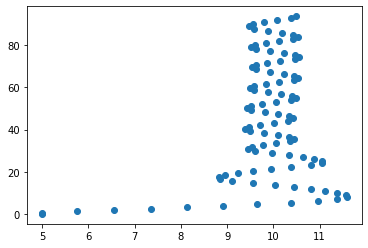

In [86]:
calculate_test_data(x_test=5, fi_test=40)

number of iterations exeeded. no result


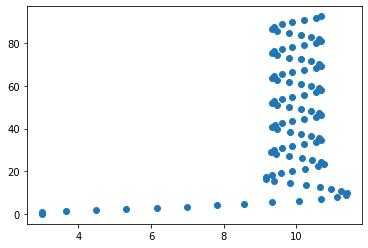

In [88]:
calculate_test_data(x_test=3, fi_test=45)